## IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as ps
import numpy as ns
import seaborn as sn
import matplotlib.pyplot as pl
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df=ps.read_csv(r"C:\Users\Samdure\OneDrive\Desktop\American_Housing_Data.csv")

##  DATA CLEANING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39981 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39981 non-null  int64  
 1   Price                    39981 non-null  float64
 2   Beds                     39981 non-null  int64  
 3   Baths                    39981 non-null  int64  
 4   Living Space             39981 non-null  int64  
 5   Address                  39981 non-null  object 
 6   City                     39981 non-null  object 
 7   State                    39981 non-null  object 
 8   Zip Code Population      39981 non-null  int64  
 9   Zip Code Density         39981 non-null  float64
 10  County                   39981 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39981 non-null  float64
 13  Longitude                39981 non-null  float64
dtypes: float64(5), int64(5

In [4]:
df.head(10)

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
5,10017,764900.0,1,1,643,145 E 48TH ST APT 11E,New York,New York,15514,20107.7,New York,188289.0,40.75235,-73.97260
6,10021,2499000.0,2,2,1471,234 E 70TH ST APT 4,New York,New York,42484,46004.0,New York,261254.0,40.76963,-73.95899
7,10022,4580000.0,2,3,1800,641 5TH AVE # 29D,New York,New York,33303,28998.9,New York,281977.0,40.75856,-73.96787
8,10026,540000.0,2,1,750,45 CENTRAL PARK N # 4D,New York,New York,39401,39689.7,New York,117438.0,40.80302,-73.95348
9,10026,570000.0,1,1,589,300 W 110TH ST APT 19H,New York,New York,39401,39689.7,New York,117438.0,40.80302,-73.95348


In [5]:
df.tail(5)

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
39976,98199,2495000.0,4,4,3380,2626 27TH AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39977,98199,2295000.0,4,4,2878,3215 32ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39978,98199,950000.0,3,2,1380,3257 22ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39979,98199,425000.0,2,1,856,3711 26TH PL W APT 102,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39980,98199,1150000.0,3,3,2840,2911 25TH AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


In [6]:
df.isnull()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39976,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39977,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39978,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39979,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.describe()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
count,39981.000000,3.998100e+04,39981.000000,39981.000000,39981.000000,39981.000000,39981.000000,39979.000000,39981.000000,39981.000000
mean,64833.391336,6.227771e+05,3.171682,2.466572,1901.522723,37726.201996,2379.412483,110837.259861,36.435668,-98.080576
std,25614.601116,9.469793e+05,1.308796,1.323042,1211.307257,18672.647445,2946.574792,47309.055715,4.446862,15.061145
min,10013.000000,1.800000e+03,1.000000,1.000000,2.000000,0.000000,0.000000,27475.000000,25.729830,-122.826870
25%,40215.000000,2.650000e+05,3.000000,2.000000,1200.000000,24465.000000,902.400000,76640.000000,33.239850,-111.636310
50%,74136.000000,3.999000e+05,3.000000,2.000000,1639.000000,35049.000000,1588.700000,100405.000000,36.166620,-96.839680
75%,85730.000000,6.749900e+05,4.000000,3.000000,2265.000000,46816.000000,2736.800000,135075.000000,39.283090,-85.656980
max,98199.000000,3.800000e+07,54.000000,66.000000,74340.000000,116469.000000,58289.600000,900203.000000,47.742370,-73.704510


In [8]:
df.shape

(39981, 14)

In [9]:
df.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    2
Latitude                   0
Longitude                  0
dtype: int64

In [10]:
df.columns

Index(['Zip Code', 'Price', 'Beds', 'Baths', 'Living Space', 'Address', 'City',
       'State', 'Zip Code Population', 'Zip Code Density', 'County',
       'Median Household Income', 'Latitude', 'Longitude'],
      dtype='object')

In [11]:
df.sample(4)

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
87,10306,798000.0,3,2,1750,305 HUSSON ST,Staten Island,New York,55805,2980.6,Richmond,118424.0,40.57149,-74.12430
10927,43207,164900.0,3,1,924,2943 PARSONS AVE,Columbus,Ohio,46038,768.8,Franklin,67173.0,39.89599,-82.96392
33837,92107,595000.0,2,2,986,4444 W POINT LOMA BLVD UNIT 37,San Diego,California,29753,3798.5,San Diego,133969.0,32.74020,-117.24357
807,19125,699995.0,3,3,2406,3000 CITYVIEW WALK # 169,Philadelphia,Pennsylvania,24948,7123.8,Philadelphia,115644.0,39.97611,-75.12472


In [12]:
df.columns

Index(['Zip Code', 'Price', 'Beds', 'Baths', 'Living Space', 'Address', 'City',
       'State', 'Zip Code Population', 'Zip Code Density', 'County',
       'Median Household Income', 'Latitude', 'Longitude'],
      dtype='object')

In [13]:
df.drop(columns={'Address', 'City',
       'State','County','Zip Code'},inplace=True)

In [14]:
df

,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
0,3999000.0,2,3,1967,29563,20967.9,370046.0,40.72001,-74.00472
1,3999000.0,2,3,1967,29563,20967.9,370046.0,40.72001,-74.00472
2,1650000.0,1,1,718,29815,23740.9,249880.0,40.73407,-74.00601
3,760000.0,3,2,1538,29815,23740.9,249880.0,40.73407,-74.00601
4,1100000.0,1,1,600,29815,23740.9,249880.0,40.73407,-74.00601
...,...,...,...,...,...,...,...,...,...
39976,2495000.0,4,4,3380,22890,2086.8,205611.0,47.65139,-122.40223
39977,2295000.0,4,4,2878,22890,2086.8,205611.0,47.65139,-122.40223
39978,950000.0,3,2,1380,22890,2086.8,205611.0,47.65139,-122.40223
39979,425000.0,2,1,856,22890,2086.8,205611.0,47.65139,-122.40223


In [15]:
df.isnull().mean()*100

Price                      0.000000
Beds                       0.000000
Baths                      0.000000
Living Space               0.000000
Zip Code Population        0.000000
Zip Code Density           0.000000
Median Household Income    0.005002
Latitude                   0.000000
Longitude                  0.000000
dtype: float64

In [16]:
df.dropna(inplace=True)

In [17]:
df.head(4)

,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
0,3999000.0,2,3,1967,29563,20967.9,370046.0,40.72001,-74.00472
1,3999000.0,2,3,1967,29563,20967.9,370046.0,40.72001,-74.00472
2,1650000.0,1,1,718,29815,23740.9,249880.0,40.73407,-74.00601
3,760000.0,3,2,1538,29815,23740.9,249880.0,40.73407,-74.00601


In [18]:
df.duplicated().sum()

1447

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(38532, 9)

In [21]:
df.head(5)

,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
0,3999000.0,2,3,1967,29563,20967.9,370046.0,40.72001,-74.00472
2,1650000.0,1,1,718,29815,23740.9,249880.0,40.73407,-74.00601
3,760000.0,3,2,1538,29815,23740.9,249880.0,40.73407,-74.00601
4,1100000.0,1,1,600,29815,23740.9,249880.0,40.73407,-74.00601
5,764900.0,1,1,643,15514,20107.7,188289.0,40.75235,-73.97260


In [22]:
df['Baths'].unique()

array([ 3,  1,  2, 10,  4,  5,  9,  6, 11,  8,  7, 12, 24, 21, 20, 14, 15,
       28, 66, 18, 16, 17, 36, 19, 37, 42, 46, 56], dtype=int64)

## SCALING

In [23]:
from sklearn.preprocessing import StandardScaler


In [24]:
#Price
Price_scaler=StandardScaler()
df['Price']=Price_scaler.fit_transform(ns.array(df['Price']).reshape(len(df['Price']),1))

#Beds
Beds_scaler=StandardScaler()
df['Beds']=Beds_scaler.fit_transform(ns.array(df['Beds']).reshape(len(df['Beds']),1))

#Baths
Baths_scaler=StandardScaler()
df['Baths']=Baths_scaler.fit_transform(ns.array(df['Baths']).reshape(len(df['Baths']),1))

#Living Space
Living_Space_scaler=StandardScaler()
df['Living Space']=Living_Space_scaler.fit_transform(ns.array(df['Living Space']).reshape(len(df['Living Space']),1))

#Zip Code Population
Zip_Code_Population_scaler=StandardScaler()
df['Zip Code Population']=Zip_Code_Population_scaler.fit_transform(ns.array(df['Zip Code Population']).reshape(len(df['Zip Code Population']),1))

#Zip Code Density
Zip_Code_Density_scaler=StandardScaler()
df['Zip Code Density']=Zip_Code_Density_scaler.fit_transform(ns.array(df['Zip Code Density']).reshape(len(df['Zip Code Density']),1))

#Median Household Income
Median_Household_Income_scaler=StandardScaler()
df['Median Household Income']=Median_Household_Income_scaler.fit_transform(ns.array(df['Median Household Income']).reshape(len(df['Median Household Income']),1))

#Latitude
Latitude_scaler=StandardScaler()
df['Latitude']=Latitude_scaler.fit_transform(ns.array(df['Latitude']).reshape(len(df['Latitude']),1))


#Longitude
Longitude_scaler=StandardScaler()
df['Longitude']=Longitude_scaler.fit_transform(ns.array(df['Longitude']).reshape(len(df['Longitude']),1))

In [25]:
df.head(5)

,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
0,3.520793,-0.890824,0.403009,0.052402,-0.434679,6.338620,5.464918,0.955387,1.596649
2,1.069626,-1.652084,-1.099531,-0.974282,-0.421084,7.284213,2.929879,0.958548,1.596564
3,0.140917,-0.129564,-0.348261,-0.300238,-0.421084,7.284213,2.929879,0.958548,1.596564
4,0.495705,-1.652084,-1.099531,-1.071279,-0.421084,7.284213,2.929879,0.958548,1.596564
5,0.146030,-1.652084,-1.099531,-1.035933,-1.192575,6.045292,1.630546,0.962657,1.598782


In [26]:
import warnings
warnings.filterwarnings('ignore')


## DATA VISUALIZATION

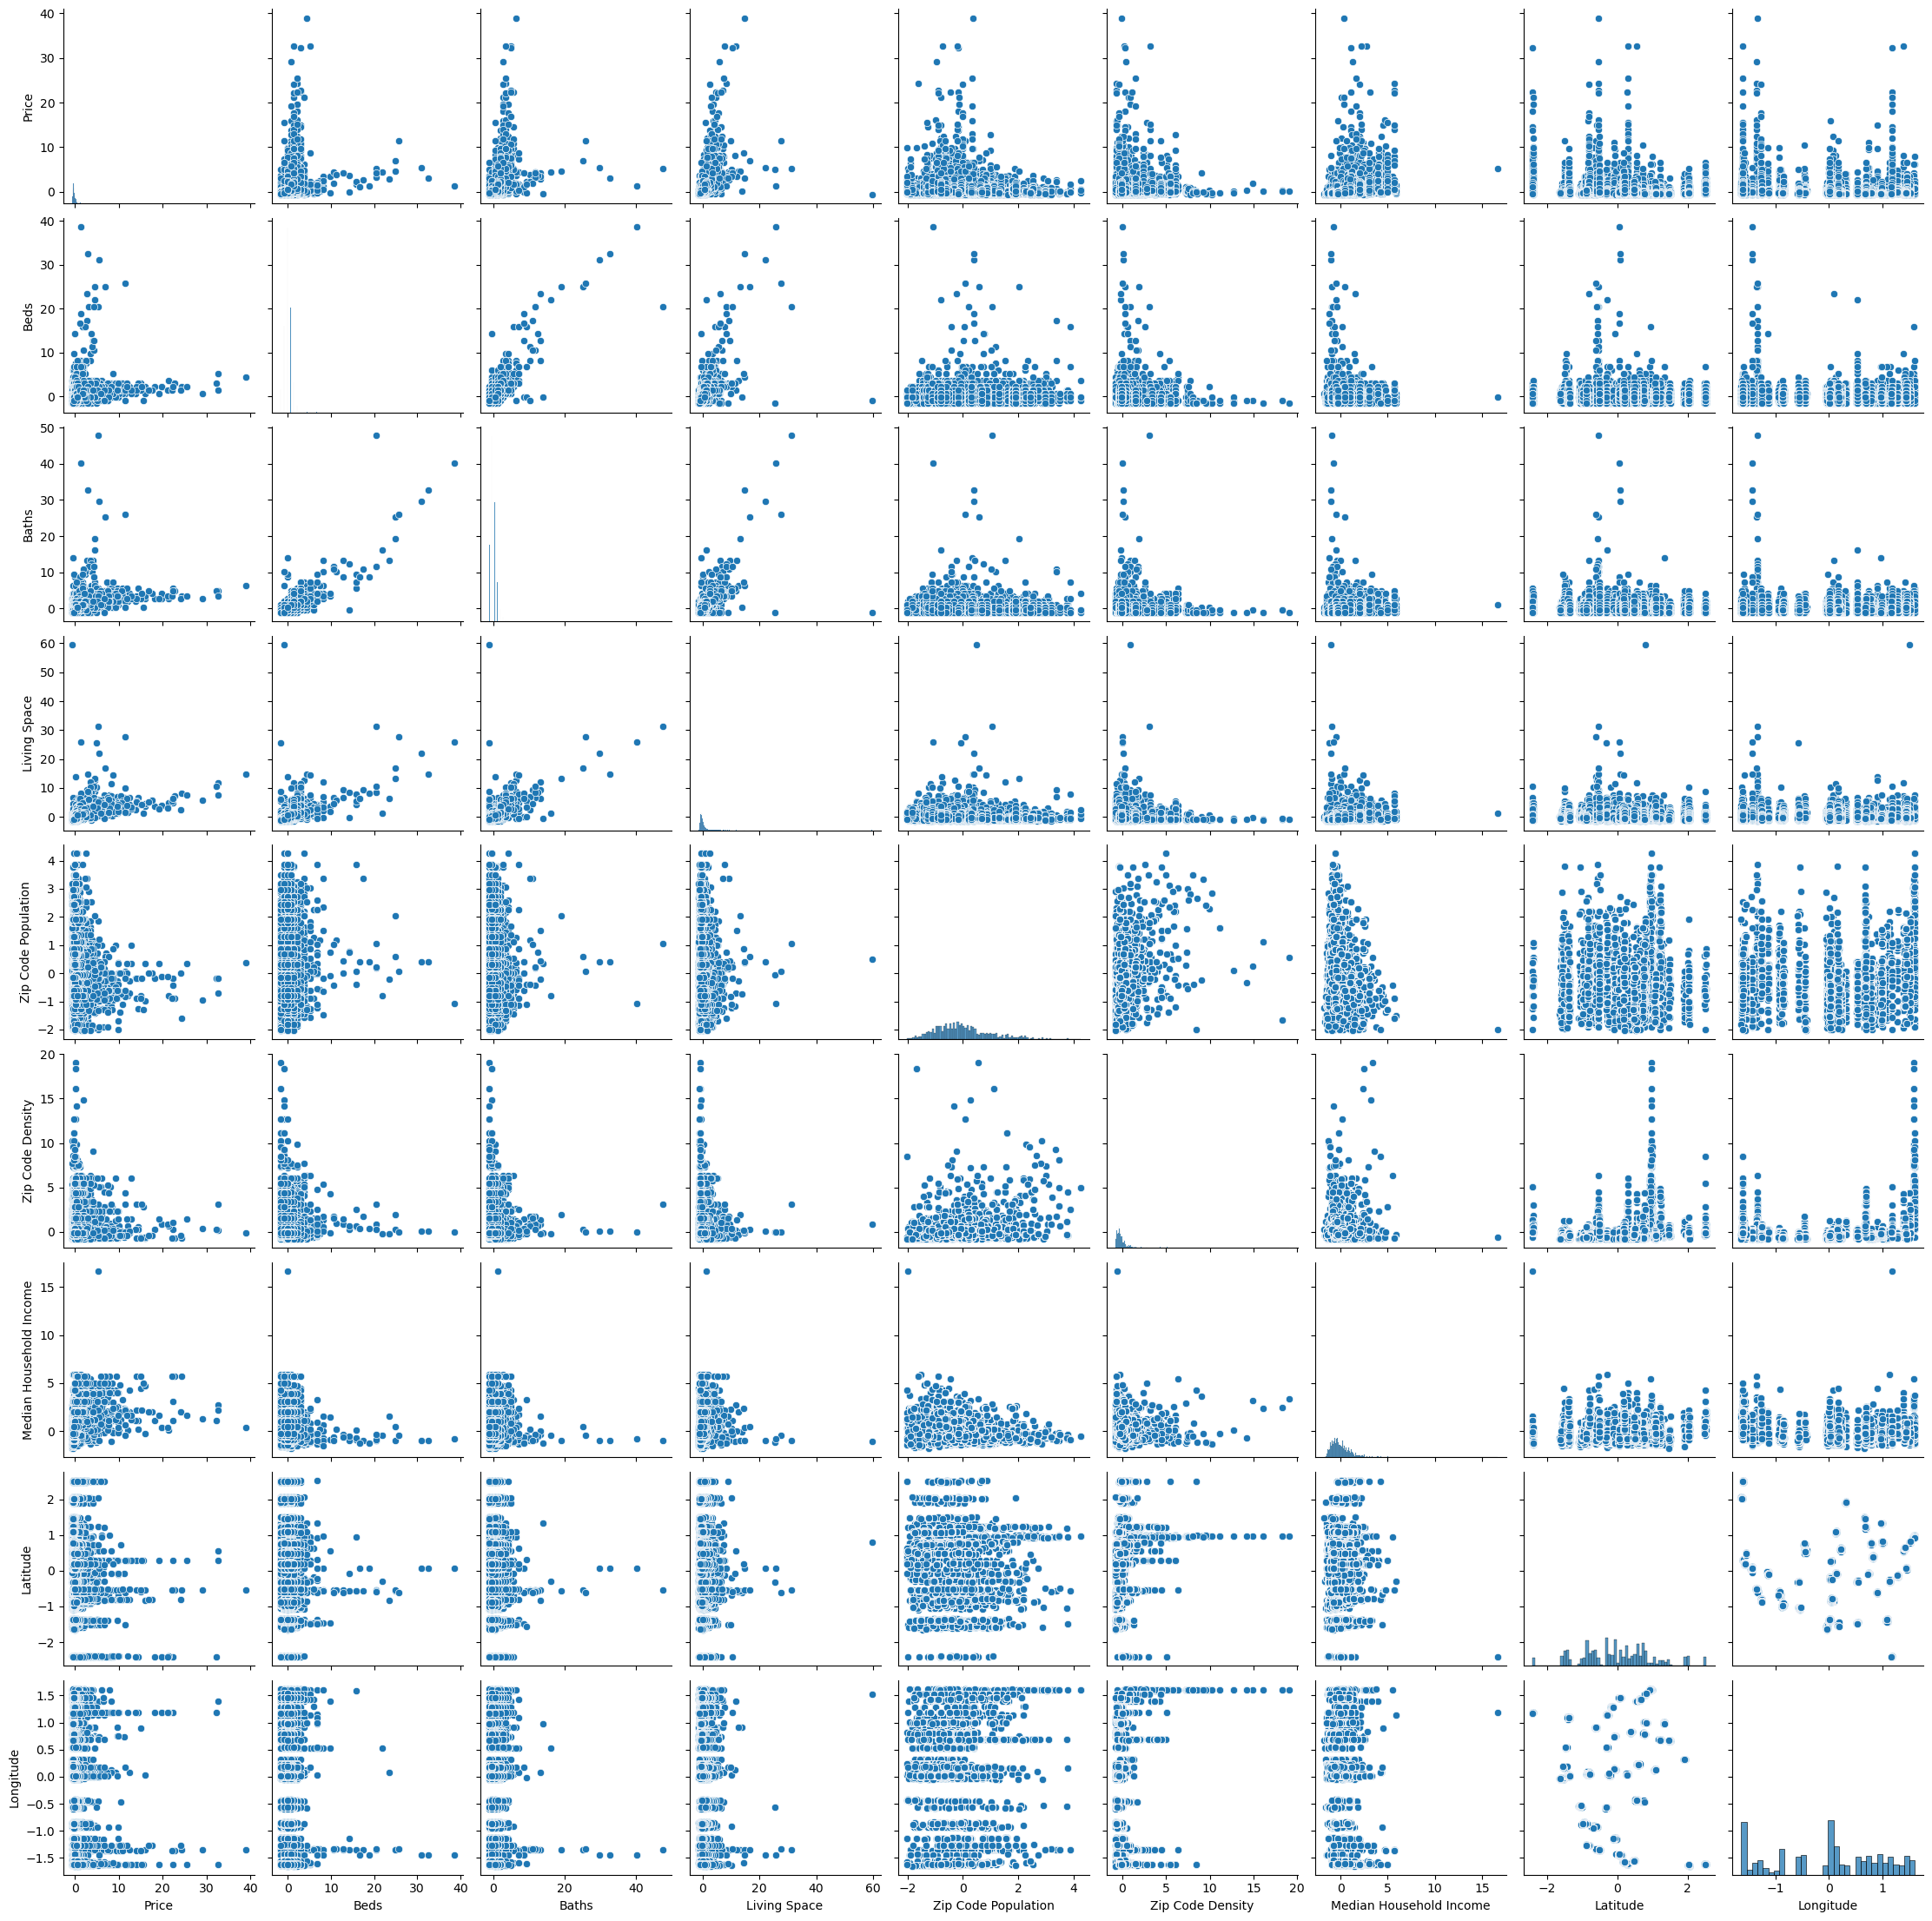

In [27]:
sn.pairplot(df)

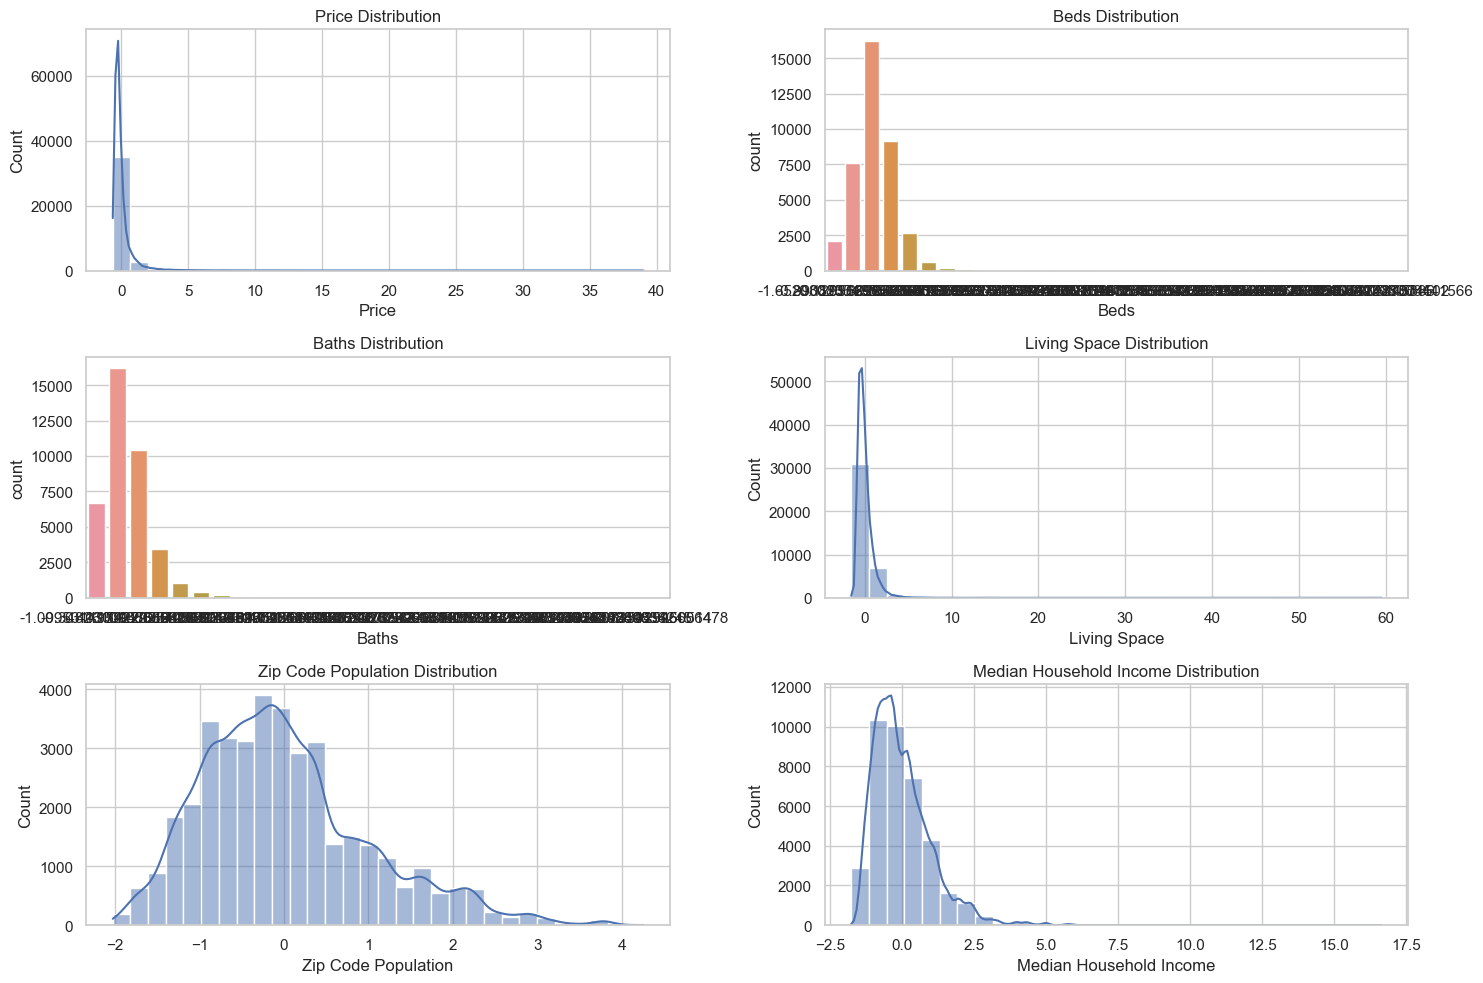

In [28]:
sn.set(style='whitegrid')

fig, axs = pl.subplots(3, 2, figsize=(15, 10))

# Price distribution
sn.histplot(df['Price'], bins=30, ax=axs[0, 0], kde=True)
axs[0, 0].set_title('Price Distribution')

# Beds distribution
sn.countplot(x='Beds', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Beds Distribution')

# Baths distribution
sn.countplot(x='Baths', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Baths Distribution')

# Living Space distribution
sn.histplot(df['Living Space'], bins=30, ax=axs[1, 1], kde=True)
axs[1, 1].set_title('Living Space Distribution')

# Zip Code Population distribution
sn.histplot(df['Zip Code Population'], bins=30, ax=axs[2, 0], kde=True)
axs[2, 0].set_title('Zip Code Population Distribution')

# Median Household Income distribution
sn.histplot(df['Median Household Income'], bins=30, ax=axs[2, 1], kde=True)
axs[2, 1].set_title('Median Household Income Distribution')

pl.tight_layout()
pl.show()

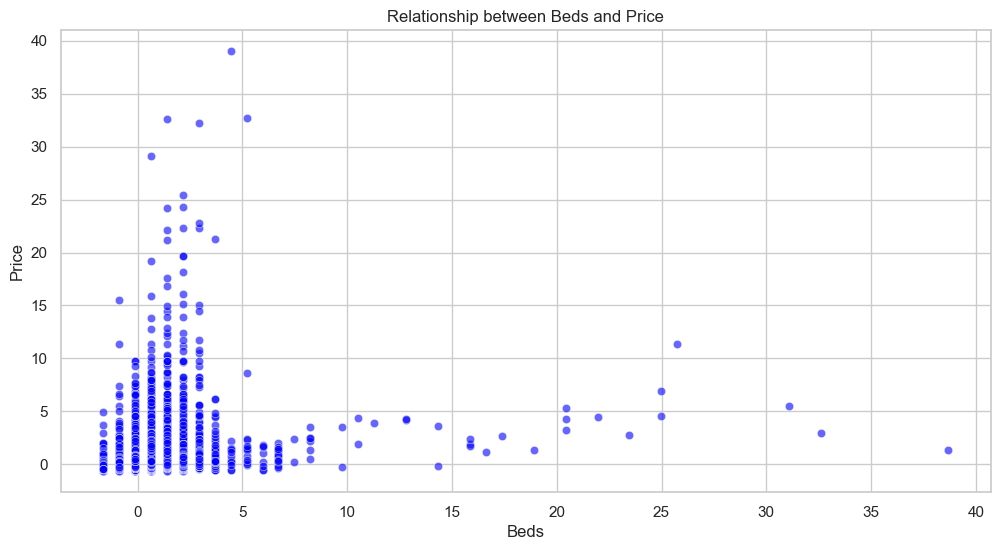

In [29]:
pl.figure(figsize=(12, 6))
sn.scatterplot(x='Beds', y='Price', data=df, color='blue', alpha=0.6)
pl.title('Relationship between Beds and Price')
pl.xlabel('Beds')
pl.ylabel('Price')
pl.show()

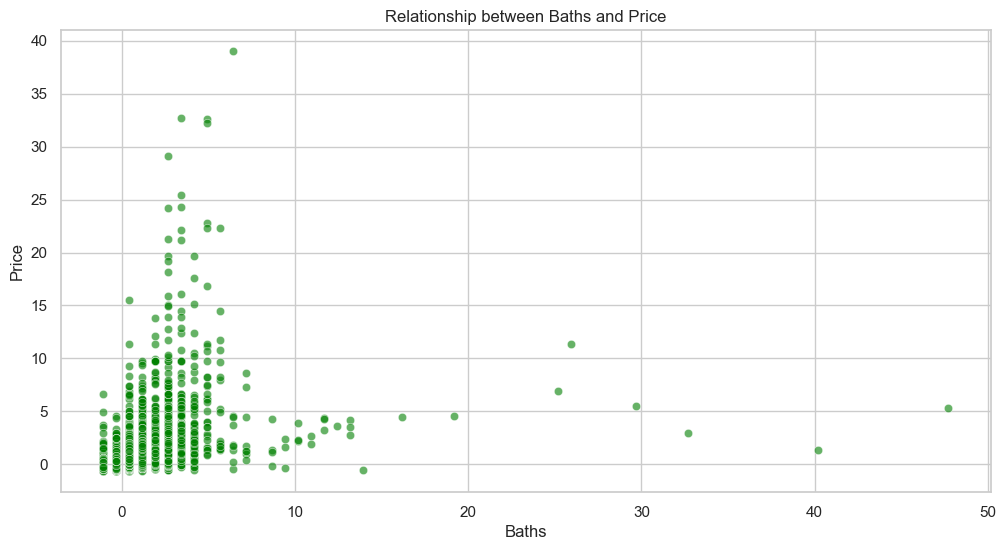

In [30]:
pl.figure(figsize=(12, 6))
sn.scatterplot(x='Baths', y='Price', data=df, color='green', alpha=0.6)
pl.title('Relationship between Baths and Price')
pl.xlabel('Baths')
pl.ylabel('Price')
pl.show()

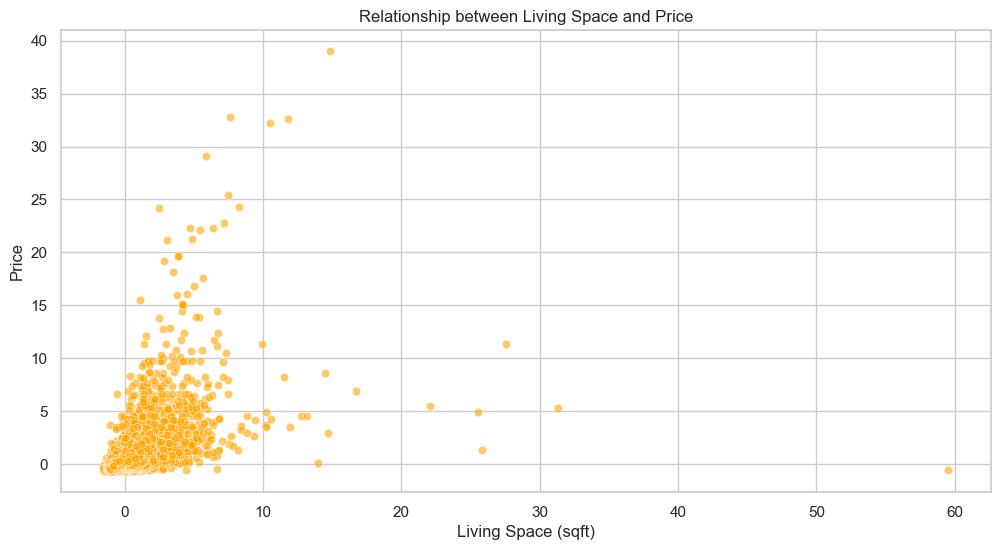

In [31]:
pl.figure(figsize=(12, 6))
sn.scatterplot(x='Living Space', y='Price', data=df, color='orange', alpha=0.6)
pl.title('Relationship between Living Space and Price')
pl.xlabel('Living Space (sqft)')
pl.ylabel('Price')
pl.show()

In [32]:
df

,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
0,3.520793,-0.890824,0.403009,0.052402,-0.434679,6.338620,5.464918,0.955387,1.596649
2,1.069626,-1.652084,-1.099531,-0.974282,-0.421084,7.284213,2.929879,0.958548,1.596564
3,0.140917,-0.129564,-0.348261,-0.300238,-0.421084,7.284213,2.929879,0.958548,1.596564
4,0.495705,-1.652084,-1.099531,-1.071279,-0.421084,7.284213,2.929879,0.958548,1.596564
5,0.146030,-1.652084,-1.099531,-1.035933,-1.192575,6.045292,1.630546,0.962657,1.598782
...,...,...,...,...,...,...,...,...,...
39976,1.951378,0.631697,1.154280,1.213896,-0.794665,-0.099833,1.995973,2.513491,-1.617405
39977,1.742680,0.631697,1.154280,0.801249,-0.794665,-0.099833,1.995973,2.513491,-1.617405
39978,0.339181,-0.129564,-0.348261,-0.430115,-0.794665,-0.099833,1.995973,2.513491,-1.617405
39979,-0.208653,-0.890824,-1.099531,-0.860846,-0.794665,-0.099833,1.995973,2.513491,-1.617405


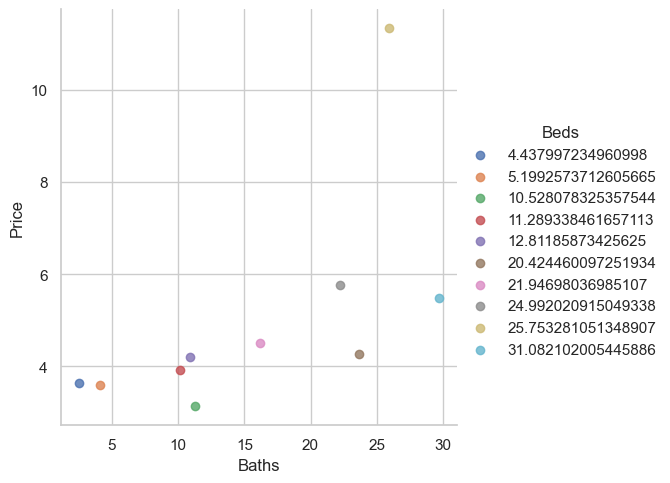

In [33]:
# Baths, Living Area, Median Household Income, have a high correlation with price
sn.lmplot(df.groupby('Beds')[['Baths','Price']].mean().sort_values('Price', ascending=False).reset_index().head(10), x='Baths', y='Price', hue='Beds')

<Axes: xlabel='Baths', ylabel='Price'>

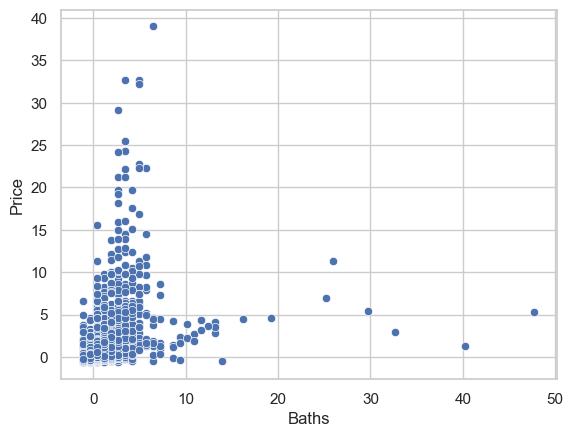

In [34]:
sn.scatterplot(x='Baths',y='Price',data=df)

##  LINEAR REGRESSION MODEL

In [35]:
X = df.drop('Price',axis=1)
Y= df['Price']

In [36]:
X

,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
0,-0.890824,0.403009,0.052402,-0.434679,6.338620,5.464918,0.955387,1.596649
2,-1.652084,-1.099531,-0.974282,-0.421084,7.284213,2.929879,0.958548,1.596564
3,-0.129564,-0.348261,-0.300238,-0.421084,7.284213,2.929879,0.958548,1.596564
4,-1.652084,-1.099531,-1.071279,-0.421084,7.284213,2.929879,0.958548,1.596564
5,-1.652084,-1.099531,-1.035933,-1.192575,6.045292,1.630546,0.962657,1.598782
...,...,...,...,...,...,...,...,...
39976,0.631697,1.154280,1.213896,-0.794665,-0.099833,1.995973,2.513491,-1.617405
39977,0.631697,1.154280,0.801249,-0.794665,-0.099833,1.995973,2.513491,-1.617405
39978,-0.129564,-0.348261,-0.430115,-0.794665,-0.099833,1.995973,2.513491,-1.617405
39979,-0.890824,-1.099531,-0.860846,-0.794665,-0.099833,1.995973,2.513491,-1.617405


In [37]:
Y

0        3.520793
2        1.069626
3        0.140917
4        0.495705
5        0.146030
           ...   
39976    1.951378
39977    1.742680
39978    0.339181
39979   -0.208653
39980    0.547880
Name: Price, Length: 38532, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [40]:
model = LinearRegression()

In [41]:
model.fit(X_train,Y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test)
y_pred

array([-0.60675959,  1.76218257,  0.3105298 , ..., -0.34763035,
        0.1734936 , -0.42821048])

In [43]:
X_test

,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
13412,-0.129564,-0.348261,-0.286264,-0.335687,0.085228,-1.193953,1.487314,0.668800
36437,0.631697,1.905550,2.290722,-0.295443,1.212198,1.327458,0.301761,-1.606663
10219,-0.129564,1.154280,0.590816,-0.748864,-0.552169,0.407560,0.402746,0.830379
37059,-0.129564,1.154280,0.032674,0.855454,0.155098,2.400007,0.185601,-1.583659
527,-0.890824,-0.348261,-0.167073,0.507013,5.745996,-0.063854,0.956839,1.606164
...,...,...,...,...,...,...,...,...
27479,-0.129564,0.403009,0.015412,0.073768,-0.398003,0.377709,0.558808,-0.446584
36363,0.631697,0.403009,0.265301,-0.208535,0.803646,0.764233,0.307116,-1.609700
25241,-0.129564,0.403009,-0.335584,-0.845212,-0.371303,-1.582460,-1.057238,-0.556380
29606,-0.129564,-0.348261,0.478201,-0.163112,-0.561206,-0.115772,-0.928613,-0.859181


In [44]:
Y_test

13412   -0.422569
36437    0.901624
10219    0.015698
37059    0.495588
527      0.326659
           ...   
27479   -0.134878
36363    0.390312
25241   -0.479961
29606    0.014654
31296   -0.433004
Name: Price, Length: 7707, dtype: float64

In [45]:
X_train

,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
37751,0.631697,-0.348261,-0.394769,-0.368864,0.204884,-0.895359,0.460276,-1.553601
29600,-0.129564,-0.348261,-0.241876,-0.163112,-0.561206,-0.115772,-0.928613,-0.859181
25684,-0.129564,0.403009,0.613010,-0.486953,-0.537063,-0.116130,-1.032313,-0.568438
26492,0.631697,-0.348261,-0.249274,1.606121,0.390627,-0.683828,0.724966,-0.464011
2632,1.392957,-0.348261,0.285030,-0.921925,0.218013,-1.242770,0.632634,1.420763
...,...,...,...,...,...,...,...,...
6634,-0.129564,-0.348261,-0.176115,-0.105335,-0.238279,-0.906624,-1.379561,1.093294
11769,-0.129564,-1.099531,-0.196665,0.023328,-0.357629,-1.208383,0.746528,0.785786
39575,-0.890824,-0.348261,-0.599448,0.610482,0.220980,0.716091,2.488980,-1.608539
932,-0.890824,-1.099531,-0.750697,1.185175,1.465288,-1.213826,0.791183,1.523356


In [46]:
X_test

,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
13412,-0.129564,-0.348261,-0.286264,-0.335687,0.085228,-1.193953,1.487314,0.668800
36437,0.631697,1.905550,2.290722,-0.295443,1.212198,1.327458,0.301761,-1.606663
10219,-0.129564,1.154280,0.590816,-0.748864,-0.552169,0.407560,0.402746,0.830379
37059,-0.129564,1.154280,0.032674,0.855454,0.155098,2.400007,0.185601,-1.583659
527,-0.890824,-0.348261,-0.167073,0.507013,5.745996,-0.063854,0.956839,1.606164
...,...,...,...,...,...,...,...,...
27479,-0.129564,0.403009,0.015412,0.073768,-0.398003,0.377709,0.558808,-0.446584
36363,0.631697,0.403009,0.265301,-0.208535,0.803646,0.764233,0.307116,-1.609700
25241,-0.129564,0.403009,-0.335584,-0.845212,-0.371303,-1.582460,-1.057238,-0.556380
29606,-0.129564,-0.348261,0.478201,-0.163112,-0.561206,-0.115772,-0.928613,-0.859181


In [47]:
mae=mean_absolute_error(Y_test,y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse= ns.sqrt(mse)
r2 =r2_score(Y_test,y_pred)


In [48]:
print('Mean Absolute Error',mae)
print('Mean Squared error',mse)
print('root Mean Squared error',rmse)
print('R2 score',r2)

Mean Absolute Error 0.32099721054789543
Mean Squared error 0.7689516707371317
root Mean Squared error 0.8768988942501477
R2 score 0.4134816287003974


In [49]:
model.coef_

array([-0.07371379,  0.15864634,  0.3635581 , -0.01728186,  0.15404179,
        0.24577778, -0.06971322, -0.11222055])

In [50]:
model.intercept_

-0.0037304625161884517